# PCA and Eigendecomposition

## Steps

1. Generate bi-variate normal random numbers
2. Perform PCA on the bi-variate normal random numbers
3. Perform PCA step-by-step
4. Perform eigendecomposition step-by-step

## Generate bi-variate normal random numbers

Generate random numbers from the same multivariate normal distribution. Define $\mu$ and $\mathit{Cov}$, and generate $100$ random numbers.

Covariances of multivariate normal distributions, specified as a $d$-by-$d$ (here $d=2$) symmetric, positive semi-definite matrix $\mathit{Cov}$, the covariance matrix. The covariance matrix is diagonal, containing variances along the diagonal and the covariance off it.

In [79]:
import numpy as np
mu = [2, 3]
cov = [[2, 1.5], [1.5, 4]]
np.random.seed(42)
data = np.random.multivariate_normal(mu, cov, 100)

Plot the random numbers.

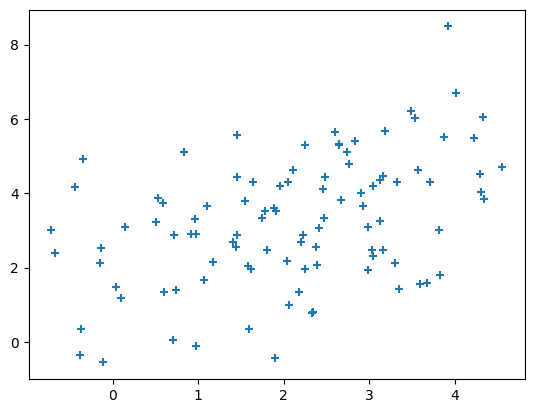

In [67]:
import matplotlib.pyplot as plt

plt.scatter(data[:,0], data[:,1], marker='+')
plt.show()

Check sample variance and covariance of the generated data points and the sample correlation between the variables.

In [88]:
import pandas as pd

cov = pd.DataFrame(np.cov(data, rowvar=False)) # used pandas here just to get a pretty output
print(cov)

print(pd.DataFrame(np.corrcoef(data, rowvar=False))) # used pandas here just to get a pretty output


          0         1
0  1.767814  1.004967
1  1.004967  2.948421
          0         1
0  1.000000  0.440189
1  0.440189  1.000000


Covariance and variance: 
$$\mathit{Cov}(X,Y)=\frac{1}{n}\sum_{i=1}^n((x_i-\mu_X)(y_i-\mu_Y))$$
$$\mathit{Var}(X)=\mathit{Cov}(X,X)=\sigma_X^2$$ 

Pearson's coefficient of correlation $$\mathit{Cor}(X, Y)=\frac{\mathit{Cov}(X, Y)}{\sigma_X \sigma_Y}=\frac{\mathit{Cov}(X, Y)}{\sqrt{\mathit{Var}(X)} \sqrt{\mathit{Var}(Y)}}$$ 

In our example $\mathit{Cov}(X, Y)=1.004967$, $\mathit{Var}(X)=1.767814$, and $\mathit{Var}(Y)=2.948421$. As expected:

In [69]:
import math

1.004967 / (math.sqrt(1.767814)*math.sqrt(2.948421))

0.44018857744365814

## Perform PCA on the bi-variate normal random numbers

In [110]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(data)

loading_vector = pca.components_
eigenvalues = pca.explained_variance_
variability_explained = pca.explained_variance_ratio_
score = pca.transform(data)

print(f'loading vector: {loading_vector}')
print(f'eigenvalues: {eigenvalues}')
print(f'variability explained: {variability_explained}')


loading vector: [[ 0.4967515   0.86789282]
 [-0.86789282  0.4967515 ]]
eigenvalues: [3.52362929 1.19260592]
variability explained: [0.74712756 0.25287244]


Check the correlation of the scores. As expected:

In [111]:
pd.DataFrame(np.corrcoef(score, rowvar=False)) # used pandas here just to get a pretty output

,0,1
0,1.000000e+00,-1.422344e-16
1,-1.422344e-16,1.000000e+00


The eigenvectors are unit vectors and orthogonal, therefore the $L2$-Norm is $1$ and the inner (scalar, dot) product is 0.

In [112]:
print(f'L2-norm loading vector 1: {np.linalg.norm(loading_vector[0])}')
print(f'L2-norm loading vector 2: {np.linalg.norm(loading_vector[1])}')
print(f'dot product of loading vector 1 and 2: {np.dot(loading_vector[0], loading_vector[1])}')

L2-norm loading vector 1: 1.0
L2-norm loading vector 2: 1.0
dot product of loading vector 1 and 2: 0.0


Produce a biplot of the scores and loading vectors of the two principle components.

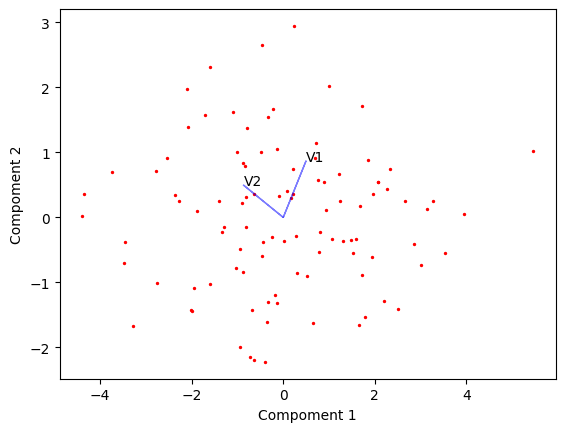

In [113]:
plt.scatter(score[:,0], score[:,1], c='r', s=2)

x1 = loading_vector[0,0]
y1 = loading_vector[0,1]
plt.arrow(0, 0, x1, y1, color='b', alpha=0.5)
plt.text(x1, y1, "V1")

x2 = loading_vector[1,0]
y2 = loading_vector[1,1]
plt.arrow(0, 0, x2, y2, color='b', alpha=0.5)
plt.text(x2, y2, "V2")

plt.xlabel('Compoment 1')
plt.ylabel('Compoment 2')
plt.show()

## Perform PCA step-by-step

1. Center and Standardize, i.e., subtracting the mean of the data from the original dataset
2. Find the covariance matrix of the dataset
3. Find the eigenvectors associated with the greatest eigenvalues of the covariance matrix
4. Project the original dataset on the eigenvectors

### Standardize

Compute standard scores (commonly called $z$-scores) defined as $z_i=\frac{x_i-\mu_X}{\sigma_X}$.

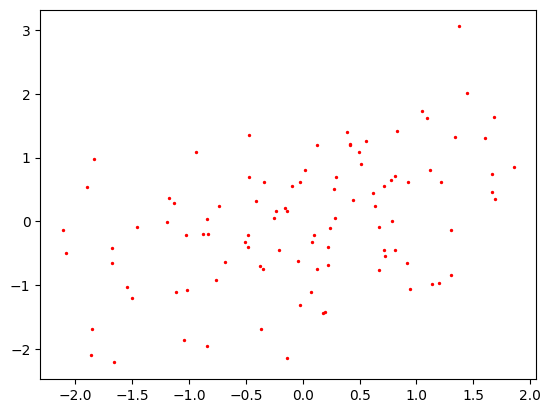

In [9]:
std_data = np.copy(data)

std_data[:,0] = (data[:,0] - np.mean(data[:,0]))/math.sqrt(1.767814)
std_data[:,1] = (data[:,1] - np.mean(data[:,1]))/math.sqrt(2.948421)



plt.scatter(std_data[:,0], std_data[:,1], c='r', s=2)
plt.show()

### Find the covariance matrix 

As before. Check out the effect of standardization on the covariance matrix.

In [121]:
cov = np.cov(std_data, rowvar=False)
pd.DataFrame(cov) # just for pretty printing

,0,1
0,1.000000,0.440189
1,0.440189,1.000000


### Find the eigenvectors and eigenvalues 

Recall the definition of eigenvectors $v$ and -values $\lambda$: $A v = \lambda v$, where $A$ is an $n$-by-$n$ matrix, $v$ is a column vector of length $n$, and $\lambda$ is a scalar.

In [122]:
eigenvalues, eigenvectors = np.linalg.eig(cov)

print(f'lambda = {eigenvalues}')
print(f'vectors = {eigenvectors}')

lambda = [0.55981135 1.44018873]
vectors = [[-0.7071068  -0.70710677]
 [ 0.70710677 -0.7071068 ]]


Mind that the second eigenvalue of $1.6253$ is larger than the first eigenvalue of $0.3747$.

*It is the same in my case, but the values are different, which is obivous, since I used other data.*

Lets check if $\mathit{Cov}\ v=\lambda v$ for the two eigenvectors and -values. As expected:

In [123]:
print(np.dot(cov,eigenvectors[:,0]))
print(eigenvalues[0] * eigenvectors[:,0])
print(f'Diff: {np.dot(cov,eigenvectors[:,0]) - eigenvalues[0] * eigenvectors[:,0]}')

[-0.39584641  0.39584639]
[-0.39584641  0.39584639]
Diff: [5.55111512e-17 5.55111512e-17]


In [124]:
print(np.dot(cov,eigenvectors[:,1]))
print(eigenvalues[1] * eigenvectors[:,1])
print(f'Diff: {np.dot(cov,eigenvectors[:,1]) - eigenvalues[1] * eigenvectors[:,1]}')

[-1.01836719 -1.01836724]
[-1.01836719 -1.01836724]
Diff: [2.22044605e-16 0.00000000e+00]


The eigenvectors returned are unit vectors and orthogonal, therefore the $2$-Norm is $1$ and the inner (scalar, dot) product is 0.

In [125]:
print(f'Vector 1 length: {np.linalg.norm(eigenvectors[:,0])}')
print(f'Vector 2 length: {np.linalg.norm(eigenvectors[:,1])}')
print(f'Vector 1 orthogonal to vector 2, if dot product is zero; dot product: {np.dot(eigenvectors[:,0],eigenvectors[:,1])}')

Vector 1 length: 0.9999999999999999
Vector 2 length: 0.9999999999999999
Vector 1 orthogonal to vector 2, if dot product is zero; dot product: 0.0


### Project the original dataset on the eigenvectors

Compute the scores of the data points corresponding to the two principle components using simple matrix multiplication of the (transposed) loading vector with the (transposed) data vector. 

Matrix multiplication means calculating the dot products of row (loading) vectors and column (data) vectors. This in turn can be interpreted as the length of the projection of the data vector onto to loading vector (multiplied by the length of the loading vector which is $1$).

Since the second eigenvalue of $1.6253$ is larger than the first eigenvalue of $0.3747$, we need to flip the scores left/right since the second column is first principle component (the one with the largest eigenvalue).

In `Matlab`, the operation `A'` computes the transpose $A^T$ of a matrix $A$.

In [128]:
eigenvectors_t = np.transpose(eigenvectors)
eigenvectors_t

array([[-0.7071068 ,  0.70710677],
       [-0.70710677, -0.7071068 ]])

In [106]:
score = np.dot(eigenvectors_t, np.transpose(std_data))
score = np.transpose(score)
score = score[:,::-1]

Check the correlation of the scores. As expected:

In [107]:
np.corrcoef(score, rowvar=False)

array([[ 1.00000000e+00, -8.99242819e-17],
       [-8.99242819e-17,  1.00000000e+00]])

Produce a biplot of the scores and loading vectors of the two principle components.

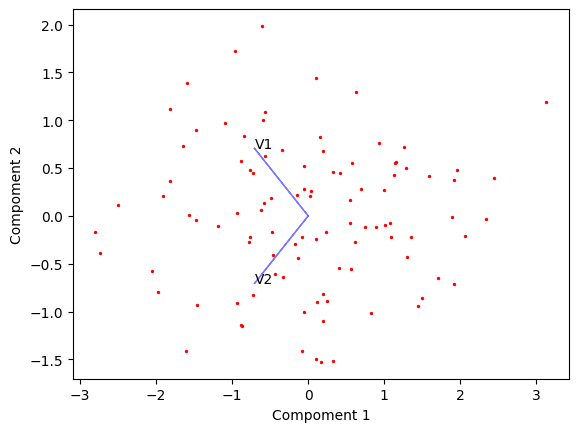

In [129]:
plt.scatter(score[:,0], score[:,1], c='r', s=2)

x1 = eigenvectors_t[0, 0]
y1 = eigenvectors_t[0, 1]
plt.arrow(0, 0, x1, y1, color='b', alpha=0.5)
plt.text(x1, y1, "V1")

x2 = eigenvectors_t[1, 0]
y2 = eigenvectors_t[1, 1]
plt.arrow(0, 0, x2, y2, color='b', alpha=0.5)
plt.text(x2, y2, "V2")

plt.xlabel('Compoment 1')
plt.ylabel('Compoment 2')
plt.show()

The eigenvalues of the covariance matrix indicate the variance in this (new) coordinate direction. We can use this information to calculate the relative variance explained by each component: for each component, we divide the variances according to the eigenvectors by the sum of the variances. In our example, the 1st and 2nd principal component contains $81.26$ and $16.74$ percent of the total variance in data.



*In my case, the 1st and 2nd principal component contains $72.00$ and $27.99$ percent of the total variance in data.*

In [49]:
print(np.var(score, axis=0))
print(np.var(score, axis=0)/np.sum(np.var(score, axis=0)))

[1.42578684 0.55421324]
[0.72009434 0.27990566]


*Why does this look differently compared to the plot when using the `pca` library? Here the answer. Mind the orientation could be different.*


Answer: *When using the pca library we did not use standardized data. If we repeat this with standardized data, we would get the same picture. (See following cells ... the story will continue)*

In [130]:

pca = PCA(n_components=2)

pca.fit(std_data)

loading_vector = pca.components_
eigenvalues = pca.explained_variance_
variability_explained = pca.explained_variance_ratio_
pca_score = pca.transform(std_data)

print(f'loading vector: {loading_vector}')
print(f'eigenvalues: {eigenvalues}')
print(f'variability explained: {variability_explained}')

loading vector: [[ 0.70710677  0.7071068 ]
 [-0.7071068   0.70710677]]
eigenvalues: [1.44018873 0.55981135]
variability explained: [0.72009434 0.27990566]


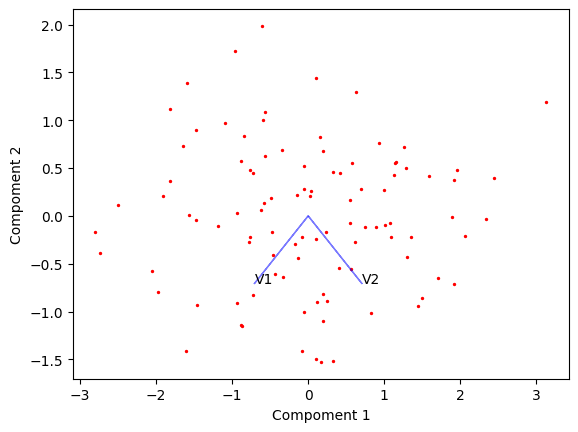

In [132]:
plt.scatter(pca_score[:,0], pca_score[:,1], c='r', s=2)

x1 = eigenvectors[0, 0]
y1 = eigenvectors[0, 1]
plt.arrow(0, 0, x1, y1, color='b', alpha=0.5)
plt.text(x1, y1, "V1")

x2 = eigenvectors[1, 0]
y2 = eigenvectors[1, 1]
plt.arrow(0, 0, x2, y2, color='b', alpha=0.5)
plt.text(x2, y2, "V2")

plt.xlabel('Compoment 1')
plt.ylabel('Compoment 2')
plt.show()

*Done this, we anyway got another picture compared to the one we got, when we did it step by step. The reason now is that the signs of second eigenvector is flipped around. However, they still meet the constraint of a unit length, as we checked before. So we would get the same picture, if we just negate the eigenvectors and plot the figure again.*

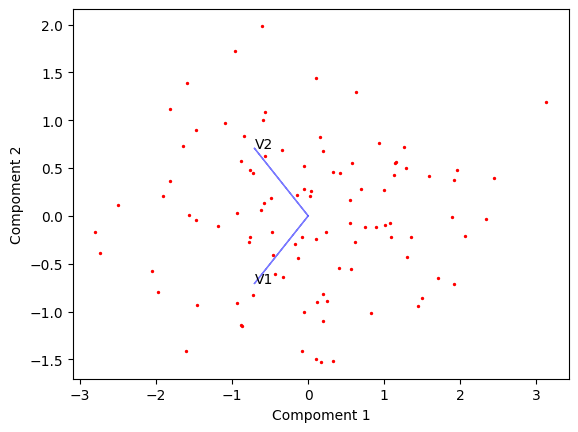

In [134]:
plt.scatter(pca_score[:,0], pca_score[:,1], c='r', s=2)

x1 = eigenvectors[0, 0] 
y1 = eigenvectors[0, 1] 
plt.arrow(0, 0, x1, y1, color='b', alpha=0.5)
plt.text(x1, y1, "V1")

x2 = eigenvectors[1, 0] * -1
y2 = eigenvectors[1, 1] * -1
plt.arrow(0, 0, x2, y2, color='b', alpha=0.5)
plt.text(x2, y2, "V2")

plt.xlabel('Compoment 1')
plt.ylabel('Compoment 2')
plt.show()

*There is one thing left: The names of the vectors (V1 and V2) are still flipped. This is because I plotted the first eigenvector as V2 in the first plot according to the step by step calculation. The first eigenvector from the step by step calulation is in fact the eigenvector of the second component and not the one of the first. So I would have to change the assignments of these vectors. (ses following cell)*

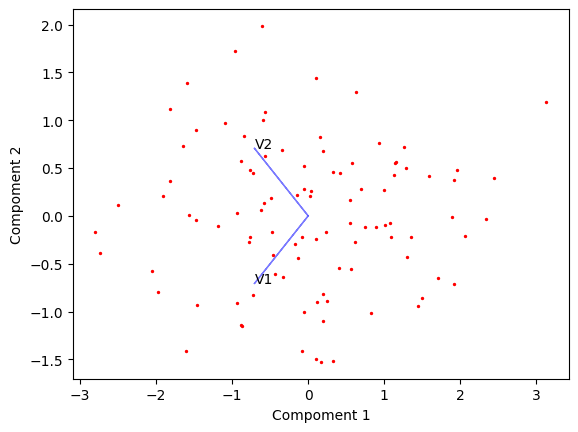

In [135]:
plt.scatter(score[:,0], score[:,1], c='r', s=2)

x1 = eigenvectors_t[0, 0] 
y1 = eigenvectors_t[0, 1]
plt.arrow(0, 0, x1, y1, color='b', alpha=0.5)
plt.text(x1, y1, "V2") # this is in fact V2 since the first eigenvalue was lower than the second

x2 = eigenvectors_t[1, 0]
y2 = eigenvectors_t[1, 1]
plt.arrow(0, 0, x2, y2, color='b', alpha=0.5)
plt.text(x2, y2, "V1") # this is in fact V1 since the second eigenvalue was higher than the first

plt.xlabel('Compoment 1')
plt.ylabel('Compoment 2')
plt.show()

## Perform eigendecomposition step-by-step

### Eigenvalues

We find the eigenvalues of an $n\times n$ (covariance) matrix $C$ by solving the so-called characteristic equation
$\det(C – \lambda I) = 0$ where $I$ is the identity matrix of size $n$.

Here $C=\mathit{Cov}$ is a $2\times 2$ matrix and the determinant of such a matrix is defiend as $\det(C)=c_{11}c_{22}-c_{12}c_{21}$. Hence, we need to solve:

\begin{align}
\det(\mathit{Cov} – \lambda I) &=(\mathit{Cov}_{11}-\lambda)(\mathit{Cov}_{22}-\lambda)-\mathit{Cov}_{12}\mathit{Cov}_{21}\\
    &=\lambda^2 -(\mathit{Cov}_{11}+\mathit{Cov}_{22})\lambda +\mathit{Cov}_{11}\mathit{Cov}_{22} -\mathit{Cov}_{12}\mathit{Cov}_{21}\\
    &=0
\end{align}

It's a quadriatic equation in $\lambda$ with, in general, two solutions.

In [63]:
Cov
a = 1;
b = -Cov(1,1)-Cov(2,2);
c = Cov(1,1)*Cov(2,2)-Cov(1,2)*Cov(2,1);

polynomial = [a b c];
eigenvalues = roots(polynomial)

Cov =
    1.0000    0.6253
    0.6253    1.0000
eigenvalues =
    1.6253
    0.3747



Let's test the two solutions $\lambda_1$ and $\lambda_2$. As expected:

In [64]:
lambda1 = diag([eigenvalues(1) eigenvalues(1)])
Char1 = Cov - lambda1;
det(Char1)
lambda2 = diag([eigenvalues(2) eigenvalues(2)])
Char2 = Cov - lambda2;
det(Char2)

lambda1 =
    1.6253         0
         0    1.6253
ans =
  -2.3893e-16
lambda2 =
    0.3747         0
         0    0.3747
ans =
  -1.1314e-16



BTW, in `Matlab` we can write the shortcut using the characteristic polynomial `poly` of a matrix :

In [65]:
eigenvalues = roots(poly(Cov))

eigenvalues =
    1.6253
    0.3747



### Eigenvectors

All that's left is to find the two eigenvectors $v_1, v_2$. We understand that by definition:

\begin{align}
Cv&=\lambda v\\
Cv-\lambda v&=0\\
Cv-\lambda I v&=0\\
(C-\lambda I) v&=0\\
\end{align}

This is nothing but solving a linear equation system.

Before, we compute the eigenvector $v_1$ associated with the eigenvalue $\lambda_1=1.6253$, we first, check if a solution exits. Therfore, we compute the rank, the determinat, and the reduced row echelon form of the matrix $A_1=C – \lambda_1 I$.

In `Matlab` the function `rref` computes the [reduced row echelon form](https://en.wikipedia.org/wiki/Row_echelon_form) of a matrix resulting from a [Gaussian elimination](https://en.wikipedia.org/wiki/Gaussian_elimination).

In [46]:
A1 = Cov - lambda1
A1_rank = rank(A1)
A1_det = det(A1)
A1_red = rref(A1)

A1 =
   -0.6253    0.6253
    0.6253   -0.6253
A1_rank =
     1
A1_det =
  -2.3893e-16
A1_red =
    1.0000   -1.0000
         0         0



As we see, we have a *general* problem: the matrix $A_1$ is not fully ranked, hence, the linear equation system is underdetermined, i.e. we have infinitly many solution. That's expected as there are infinite (eigen-) vectors with the same span. Consequently, its deteminat is 0 and $A_1$ is, hence, not invertible.

However, if we get tge direction right, the length and the orientation of an eigenvector $v$ are arbitrary. So we can set the last entry to anything, say $v_1(2) =1$, compute $v_1(1)$, and then fix the length of $v$ to get a unit vector. 

Let $𝐴_1$ be in reduced row echelon form, i.e. $A_1(i,i)=1$, and $v_1(2) =1$. The linear equation reduces to

\begin{align}
A_1(1,1)v_1(1) + A_1(1,2)v_1(2) & = 0\\
1v_1(1) + A_1(1,2)1 & = 0\\
v_1(1) + A_1(1,2) & = 0\\
v_1(1) & = - A_1(1,2) \\
\end{align}

To make it a unit length vector, we divide by the length ($L2$-norm) of the vector.

In [47]:
v1 = [-A1_red(1,2);1];
eigenvector1 = v1/norm(v1)

eigenvector1 =
    0.7071
    0.7071



Finally, we are ready to compute the eigenvector $v_2$ associated with the eigenvalue $\lambda_2=0.3747$ in the same way.

In [48]:
A2 = Cov - lambda2
A2_red = rref(A2)
v2 = [-A2_red(1,2);1];
eigenvector2 = v2/norm(v2)

A2 =
    0.6253    0.6253
    0.6253    0.6253
A2_red =
    1.0000    1.0000
         0         0
eigenvector2 =
   -0.7071
    0.7071



## References

1. http://mres.uni-potsdam.de/index.php/2017/09/14/principal-component-analysis-in-6-steps/
2. https://www.youtube.com/watch?v=ssfMqFycXOU